# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science
## Homework 2: kNN and Linear Regression

**Harvard University**<br/>
**Fall 2021**<br/>
**Instructors**: Pavlos Protopapas and Natesh Pillai

<hr style="height:2.4pt">

In [1]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

<a id="instructions"></a>

<hr style="height:2pt">

### INSTRUCTIONS


- To submit your assignment follow the instructions given in Canvas.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code continues to work, restart the kernel and rerun the notebook periodically while working through this assignment. 

- We have tried to include all the libraries you may need to do the assignment in the imports cell provided below. **Please use only the libraries provided in those imports.**

- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that clearly labels the output, includes a reference to the calculated value, and rounds it to a reasonable number of digits. **Do not hard code values in your printed output**. For example, this is an appropriate print statement:
```python
print(f'The R^2 is {R:.4f}')
```
- **Your plots MUST be clearly labeled and easy to read,** including clear labels for the $x$ and $y$ axes, a descriptive title ("MSE plot" is NOT a descriptive title; "95% confidence interval of coefficients of polynomial degree 5" on the other hand is descriptive), a legend when appropriate, and clearly formatted text and graphics.

<hr style="height:2pt">

In [2]:
# RUN THIS CELL
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

# Import libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import operator
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

# Question 7 optional imports 
from scipy.stats import norm
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

<a id="contents"></a>

## Notebook Contents

- [**PART 1 [60 pts]: Predicting the selling price of cars on CarDekho.com**](#part1)
  - [Part 1 Overview](#part1intro)
  - [Question 1: Exploratory data analysis (EDA) [10 pts]](#part1questions)
  - [Question 2: k-Nearest Neighbors [25 pts]](#part2questions)
  - [Question 3: Simple linear regression [25 pts]](#part3questions)
  - [Question 4 (required for 209a students, optional for others):  Linear regression with feature engineering [10 pts]](#part4questions)


- [**PART 2 [40 pts]: Analysis of publically available profiles on SimplyMarry.com**](#part2)
  - [Part 2 Overview](#part2intro)
  - [Question 5:   Investigating relationships of SimplyMarry.com reported attributes [25 pts]](#part5questions)
  - [Question 6:  Calculate the Gini coefficient [15 pts]](#part6questions)
  - [Question 7 (required for 209a students, optional for others):  Multi-linear regression [10 pts]](#part7questions)


## About this homework

This assignment is the first where we will go through the process of loading a dataset, splitting it in train and test sets, pre-processing it, and finally running models and evaluating our results.

We have two different datasets, one with car data in [**PART 1**](#part1) and another with data from an Indian matrimonial web site in [**PART 2**](#part2). Using these datasets, you will explore two simple methods for prediction,  **k-nearest neighbors regression (kNN)**, a *non-parametric* method, and **linear regression**, a *parametric* method.

**PLEASE NOTE:** [Question 4](#part4questions) and [Question 7](#part7questions) are **required for 209a students** and are **optional for 109a students**. 109a students are welcome to complete Q4 and Q7, if time permits, for your own learning experience. However, neither Q4 nor Q7 will be graded for 109a students and neither will not count toward your grade. On the otherhand, 209a students MUST complete Q4 and Q7, and both questions will be graded.

<a id="part1"></a>
    
# PART 1 [60 pts]: Predicting the selling price of cars on CarDekho.com

[Return to contents](#contents)

<a id="part1intro"></a>

## Overview

[Return to contents](#contents)

According to its website, **CarDekho.com** is India's leading car search venture. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons, as well as videos and pictures of all car brands and models available in India. Each car has a **current selling price**, which is the price for buying a used car on this site, and an **MRP**, which is the retail price of the car. These two prices differ depending on factors such as brand, make year, mileage, condition, etc.  

### Dataset 

The dataset contains 601 used cars and is available as `data/car_dekho_full.csv`. It contains the following columns:

- **Year** - make year (year the car was made), 
- **Current_Selling_Price** - current price of a used car on CarDekho.com (in lakhs),
- **MRP** - maximum retail price of the car when it was new (in lakhs). 
- **Kms_Driven** - number of kilometers

**NOTE:** 1 *lakh*  is 100,000 Rupees in the Indian numbering system. Also, kilometers are used as a measure of distance instead of miles.

### Objective

Using kNN and linear regression we will predict the `Current_Selling_Price` from the other features available in this dataset.

<a id="part1questions"></a>

## <div class='exercise'><b> Question 1: Exploratory data analysis (EDA) [10 pts]</b></div>

[Return to contents](#contents)

To reach the goal of predicting the `Current_Selling_Price`, start by inspecting the dataset using Exploratory Data Analysis (EDA).

**Load the dataset, inspect it, and answer the following questions:**

**1.1** Identify all variables in the dataset. Which ones are quantitative, and which ones are categorical? If you think any variables are categorical, briefly explain why.

**1.2** What are the means and standard deviations for `Current_Selling_Price` and `MRP`? 

**1.3** What is the range of kilometers that the cars have been driven?

**1.4** The goal of this part is to identify the best variable from which to predict our response variable `Current_Selling_Price`. 

- Plot a scatter plot between each predictor and our reponse variable and examine the relationship between the predictors and `Current_Selling_Price`.
- Based on the plots, which is the predictor that visually seems to best predict the `Current_Selling_Price`? 
    
    
**PLEASE NOTE:** In this course, you will be expected to ALWAYS label your axes, title your graphs, and produce visuals which clearly communicate the data (as described in the [Instructions](#instructions) at the start of this notebook). Visuals should often be accompanied by text identifying the key point of the visual and defending any choices you make as a data scientist regarding the visual to best communicate your data.

## Question 1: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>  

To reach the goal of predicting the `Current_Selling_Price`, start by inspecting the dataset using Exploratory Data Analysis (EDA).

**Load the dataset, inspect it, and answer the following questions:**
    
**1.1** Identify all variables in the dataset. Which ones are quantitative, and which ones are categorical? If you think any variables are categorical, briefly explain why.

</div>

In [3]:
# your code here
car_data = pd.read_csv('data/car_dekho_full.csv')
car_data.dtypes
car_data.head()


,Year,Current_Selling_Price,MRP,Kms_Driven
0,2016,5.25,5.70,3493
1,2005,3.51,13.70,75000
2,2010,0.31,1.05,213000
3,2006,2.10,7.60,50456
4,2005,0.20,0.57,55000


**INTERPRETATION:**

**your answer here**
The only categorical variable is the car Year. The reason for this is because it is descriptive variable that we can use to group the cars. It doesn't necessarily represent a measurement. We are not giving the year that we are selling the cars so we cannot get the car age. I would assume car Year would be similar to model. \
The quantitative variables are: Current_Selling_Prince, MRP, and Kms_driven.


<div class='exercise-r'>  

**1.2** What are the means and standard deviations for `Current_Selling_Price` and `MRP`? 

</div>

In [4]:
# Be certain to name your variables mean_csp, mean_mrp, std_csp, std_mrp
# to match the variable names used in the provided print function

# your code here
mean_csp = car_data['Current_Selling_Price'].mean()
mean_mrp = car_data['MRP'].mean()
std_csp = car_data['Current_Selling_Price'].std()
std_mrp =car_data['MRP'].std()


# end your code here 

print(
    "\n"
    f"The mean Current Selling Price is {mean_csp:.4f} lakhs\n"
    f"The mean MRP is {mean_mrp:.4f} lakhs\n"
    f"The Standard Deviation of Current Selling Price is {std_csp:.4f}\n"
    f"The Standard Deviation of MRP is {std_mrp:.4f}"
)


The mean Current Selling Price is 4.3931 lakhs
The mean MRP is 6.9116 lakhs
The Standard Deviation of Current Selling Price is 4.5183
The Standard Deviation of MRP is 6.4801


<div class='exercise-r'>  

**1.3** What is the range of kilometers that the cars have been driven?

</div>

In [5]:
# your code here
high_kms = car_data['Kms_Driven'].max() #find the max value in data set
low_kms = car_data['Kms_Driven'].min() #find the min value in data set 

print(f"The range of kilometers that the cars have been driven are {low_kms} km to {high_kms} km" )


The range of kilometers that the cars have been driven are 500 km to 213000 km


<div class='exercise-r'>  

**1.4** The goal of this part is to identify the best variable from which to predict our response variable `Current_Selling_Price`. 

- Plot a scatter plot between each predictor and our reponse variable and examine the relationship between the predictors and `Current_Selling_Price`.
- Based on the plots, which is the predictor that visually seems to best predict the `Current_Selling_Price`? 
    
    
**PLEASE NOTE:** In this course, you will be expected to ALWAYS label your axes, title your graphs, and produce visuals which clearly communicate the data (as described in the [Instructions](#instructions) at the start of this notebook). Visuals should often be accompanied by text identifying the key point of the visual and defending any choices you make as a data scientist regarding the visual to best communicate your data.

</div>

/Users/adrianatrejo-sheu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/adrianatrejo-sheu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/adrianatrejo-sheu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result i

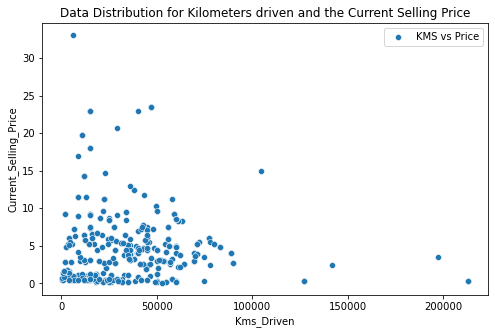

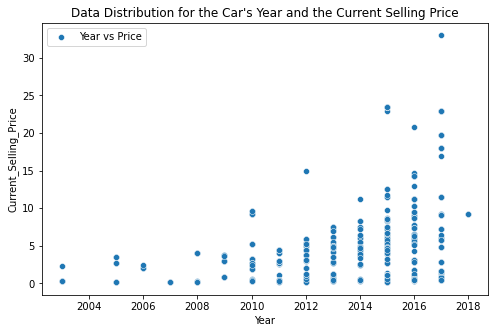

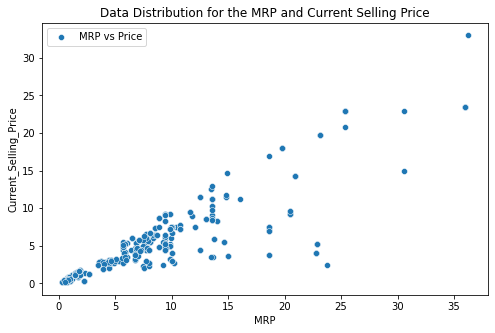

In [6]:
# your code here
plt.figure(figsize=[8,5]) # set size of figure
sns.scatterplot(car_data['Kms_Driven'],car_data['Current_Selling_Price'], label='KMS vs Price') #plot KMS vs Price
plt.title("Data Distribution for Kilometers driven and the Current Selling Price")

plt.figure(figsize=[8,5])
sns.scatterplot(car_data['Year'],car_data['Current_Selling_Price'] , label='Year vs Price') #plot Year vs Price
plt.title("Data Distribution for the Car's Year and the Current Selling Price")

plt.figure(figsize=[8,5])
sns.scatterplot(car_data['MRP'],car_data['Current_Selling_Price'] , label='MRP vs Price')  #Plot MRP vs Price
plt.title("Data Distribution for the MRP and Current Selling Price")
plt.legend()
plt.show()


**INTERPRETATION:**

**your answer here**
It looks like the MRP and Current Selling Price show a positive correlation, as MRP increases so does price. A similar correlation can be seen for the year the car was made and the current selling price. The KMS driven does not show as clear of a correlation or impact on the current selling price. Visually, I am going to choose MRP to be the predictor to show Current Selling Price because it looks the most linear and seems to have less outliers than Year.

<a id="part2questions"></a>

## <div class='exercise'><b> Question 2:   k-Nearest Neighbors [25 pts]</b></div>

[Return to contents](#contents)

We begin our modeling with k-Nearest Neighbors (kNN) regression. For this, we will use `sklearn`'s built-in functions.

**2.1** Split the dataset into a train and test set with 75% training data and 25% testing data, using argument `random_state = 109`.

**2.2** Now, we will fit several kNN regression models for various values of $k$ to identify the best parameterization for our model.

- **2.2.1** For each $k$ in $k \in [1,2,3,5,7,10,50,100]$, fit a k-NN regression model to the training data with response `Current_Selling_Price` and the predictor chosen in Question 1.4. 
  - For each $k$, make a plot of reponse vs. predictor (8 plots in total, arranged in a 4×2 grid). 
  - Each plot of your 8 plots should clearly show (a) the training data and the testing data in different colors, (b) the model prediction, and (c) title, legend, and axis labels.
  - **NOTE:** Feel free to use the `plt.subplots()` code we provide to specify your 4x2 grid, unless you first try that and decide that you have a clearer, cleaner way of accomplishing this task. 
- **2.2.2** Plot the training and test $MSE$ values as a function of $k$ (1 plot in total)
- **2.2.3** Find the best model based on the test $MSE$ values.
- **2.2.4** Evaluate and report the $R^2$ of the best model.


**2.3** Discuss your results by answering the following questions.  You should answer the questions directly in the provided markdown cells of your notebook.

- **2.3.1** How does the value of $k$ affect the fitted model?
- **2.3.2** If $n$ is the number of observations in the training set, what can you say about a kNN regression model that uses $k = n$?  
- **2.3.3** Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.
- **2.3.4** Try rerunning the same code by changing the random seed during the train-test split (just be certain to return it to `random_state = 109` and then rerun it prior to moving on to Question 3). Do you always get the same answer? If not, why?

## Question 2: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>  

**2.1** Split the dataset into a train and test set with 75% training data and 25% testing data, using argument `random_state = 109`.

</div>

In [7]:
# your code here
# need double bracket 


train_data, test_data = train_test_split(car_data, test_size=0.25, random_state= 109)  #splitting up the data into test and train
x_train, y_train = train_data[['MRP']], train_data['Current_Selling_Price']   #further breaking down the data to reference
x_test, y_test = test_data[['MRP']], test_data['Current_Selling_Price']

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)   #make sure the shapes are correct



(450, 1) (450,) (151, 1) (151,)


<div class='exercise-r'>  

**2.2** Now, we will fit several kNN regression models for various values of $k$ to identify the best parameterization for our model.
    
- **2.2.1** For each $k$ in $k \in [1,2,3,5,7,10,50,100]$, fit a k-NN regression model to the training data with response `Current_Selling_Price` and the predictor chosen in Question 1.4. 
  - For each $k$, make a plot of reponse vs. predictor (8 plots in total, arranged in a 4×2 grid). 
  - Each plot of your 8 plots should clearly show (a) the training data and the testing data in different colors, (b) the model prediction, and (c) title, legend, and axis labels.
  - **NOTE:** Feel free to use the `plt.subplots()` code we provide to specify your 4x2 grid, unless you first try that and decide that you have a clearer, cleaner way of accomplishing this task. 

</div>

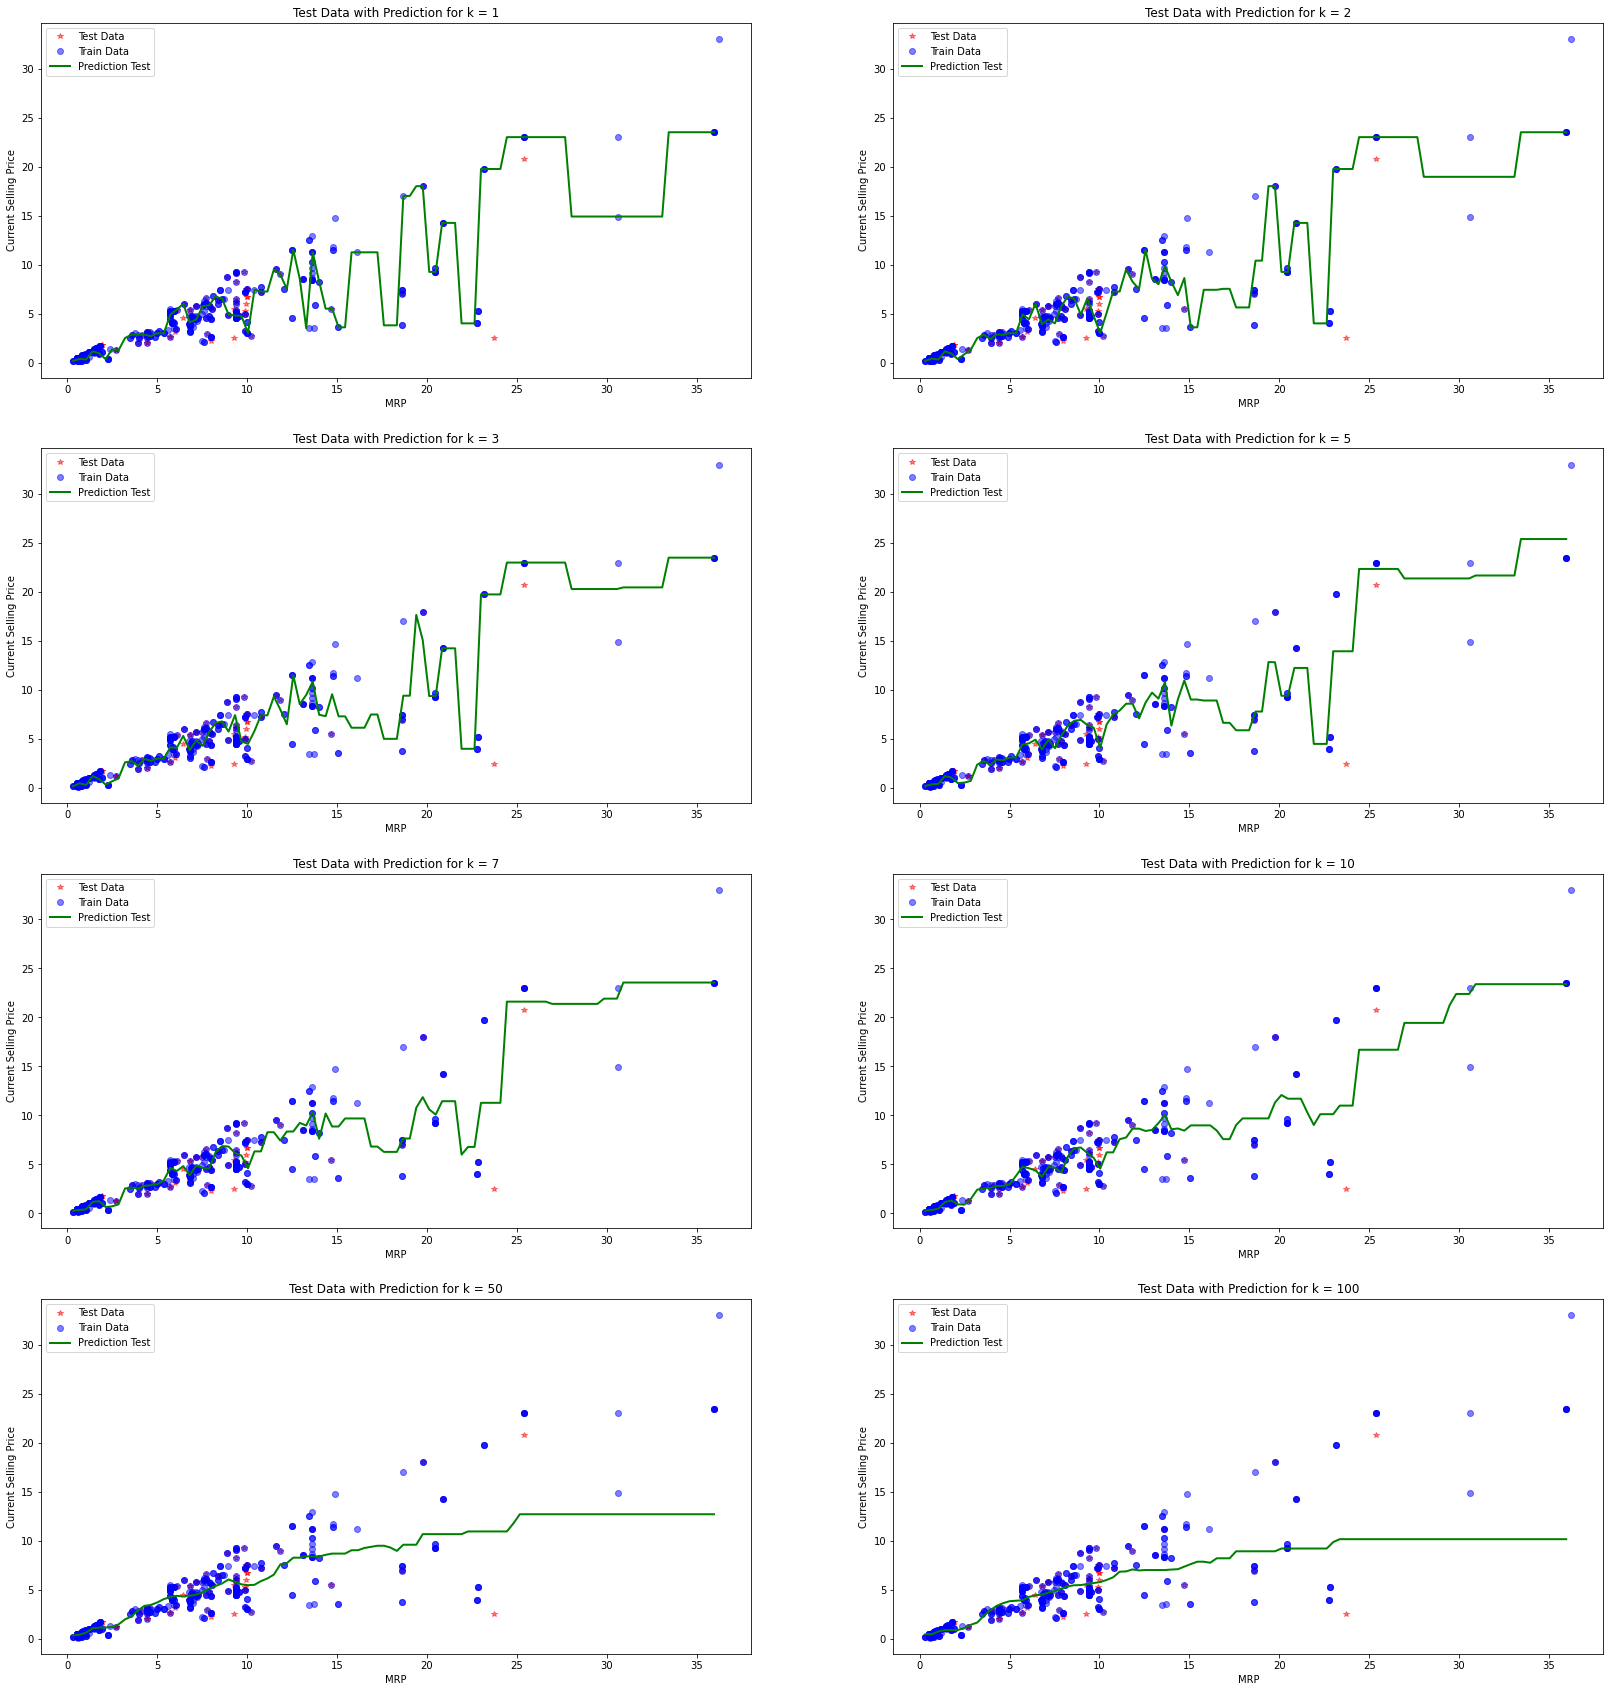

In [8]:
# your code here

fig, axs = plt.subplots(4,2,figsize =(28,30))
axs = axs.flatten()
k_list = np.array([1,2,3,5,7,10,50,100])


xvals = np.linspace(x_test.min(),x_test.max(),100) #creating synthetic values to plot the prediction trend line


knn_test_preds = []  #store the values


for i, k in enumerate(k_list):
    neighbors = KNeighborsRegressor(n_neighbors=k)   
    neighbors.fit(x_train, y_train) 
    y_preds = neighbors.predict(x_test) # creating real predictions
    pred_val = neighbors.predict(xvals) # creating the prediciton on synthetic values
    knn_test_preds.append(y_preds)  
    

    axs[i].plot(x_test, y_test, 'r*', alpha = 0.5, label = 'Test Data' )
    axs[i].plot(x_train, y_train, 'bo', alpha = 0.5, label = 'Train Data' )
    axs[i].plot(xvals, pred_val, 'g-', linewidth = 2, markersize = 10, label = 'Prediction Test')
    axs[i].set_title(f'Test Data with Prediction for k = {k}')
    axs[i].set_xlabel('MRP')
    axs[i].set_ylabel('Current Selling Price')
    axs[i].legend()

    
    

    




<div class='exercise-r'>  

**2.2.2** Plot the training and test $MSE$ values as a function of $k$ (1 plot in total)

</div>

K value 1
Here is our MSE test set for each k value 3.650 
Here is our MSE train set for each k value 1.436 

K value 2
Here is our MSE test set for each k value 3.501 
Here is our MSE train set for each k value 1.120 

K value 3
Here is our MSE test set for each k value 3.132 
Here is our MSE train set for each k value 1.435 

K value 5
Here is our MSE test set for each k value 2.338 
Here is our MSE train set for each k value 2.069 

K value 7
Here is our MSE test set for each k value 1.922 
Here is our MSE train set for each k value 2.607 

K value 10
Here is our MSE test set for each k value 2.409 
Here is our MSE train set for each k value 3.719 

K value 50
Here is our MSE test set for each k value 4.105 
Here is our MSE train set for each k value 6.419 

K value 100
Here is our MSE test set for each k value 5.462 
Here is our MSE train set for each k value 8.271 



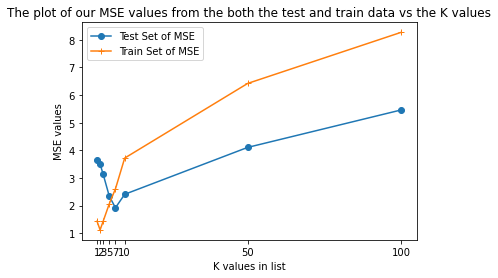

In [37]:
# your code here
mse_test_set = []   # used to store mse test values
mse_train_set = []  #used to store mse train values



for k in k_list:  #create for loop to get data for each k value
    neighbors = KNeighborsRegressor(n_neighbors=k)      # use kNN fucntion
    neighbors.fit(x_train, y_train)                     # fit on our train data
    y_preds_test = neighbors.predict(x_test)            # use the model to predict the y values for both test and train
    y_preds_train = neighbors.predict(x_train)

    mse_test = mean_squared_error(y_test,y_preds_test)   # find MSE for each k
    mse_train = mean_squared_error(y_train,y_preds_train)
    
    #append each new mse for test and for the train
    mse_test_set.append(mse_test)
    mse_train_set.append(mse_train)
   
    
    print(f"K value {k}\n"
    f"Here is our MSE test set for each k value {mse_test:.3f} \n"
    f"Here is our MSE train set for each k value {mse_train:.3f} \n")   # Get each value printed out


    
plt.figure()
plt.plot(k_list, mse_test_set,'o-' ,label = 'Test Set of MSE')
plt.plot(k_list, mse_train_set,'+-' ,label = 'Train Set of MSE')
plt.xticks(k_list)
plt.xlabel('K values in list')
plt.ylabel('MSE values')
plt.title('The plot of our MSE values from the both the test and train data vs the K values')
plt.legend()
    

<div class='exercise-r'>  

**2.2.3** Find the best model based on the test $MSE$ values.

</div>

In [10]:
# your code here
min_mse_test = min(mse_test_set)
min_model = mse_test_set.index(min_mse_test)
#print(min_model)
best_model = k_list[4]

print(f"The best model is when the MSE value is the smallest. This occurs at K = {best_model} with a value of {min_mse_test:.4f}")



The best model is when the MSE value is the smallest. This occurs at K = 7 with a value of 1.9219


<div class='exercise-r'>  

**2.2.4** Evaluate and report the $R^2$ of the best model.

</div>

In [11]:
# your code here
# find r^2
    
neighbors = KNeighborsRegressor(n_neighbors=best_model)        # I know from above that k = 7 is the best model 
neighbors.fit(x_train, y_train)
r2_train = neighbors.score(x_train, y_train)   # can use the neighbors.score to find r^2. Should be similar to metrics.r2score but takes in different inputs
r2_test = neighbors.score(x_test, y_test)   
 
print(f"K value {best_model}\n"
f"Here is the R^2 {r2_test:.3f} from the train set of the best model. \n")
    

K value 7
Here is the R^2 0.881 from the train set of the best model. 



<div class='exercise-r'>  

**2.3** Discuss your results by answering the following questions.  You should answer the questions directly in the provided markdown cells of your notebook.

**2.3.1** How does the value of $k$ affect the fitted model?

</div>

**your answer here**
The k value is the number of neighbors that are looked at when fitting the prediction line. The higher value of k means the more neighbors that are looked at and an average is taken of the distances between the point and its k amount of neighbors. With lower k values, the trend typically hits more points creating a more fitted model, which can lead to overfitting but also reduces error. The highest K does not necessarily mean that it will be the model with the lowest amount of error as seen above in question 2.2.3 where k = 7 is the lowest the lowest mean square error value for the test data. 


<div class='exercise-r'>  

**2.3.2** If $n$ is the number of observations in the training set, what can you say about a kNN regression model that uses $k = n$?

</div>

**your answer here**
A kNN regression model that uses k = n will create a model that overfits the data because it will use every data point as a reference. This will create a large average of kNN creating an average and not a fitted model.


<div class='exercise-r'>  

**2.3.3** Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.

</div>

**your answer here**
The training and test MSE plots do exhibit different trends. In the plots, the lowest MSE value for the training set returns at k = 1 where the test set returns at k = 7. The value of K is the amount of neighbors that will be used to determine how the model will fit the data. The training set is what is used to train the kNN function and it makes sense that with k = 1 it produces the lowest error because the model should fit the data points. The test data hasn't been seen by the function and is actually being evaluated. The highest k-value indicates that more neighbors are needed to achieve the correct fit of the model.

<div class='exercise-r'>  

**2.3.4** Try rerunning the same code by changing the random seed during the train-test split (just be certain to return it to `random_state = 109` and then rerun it prior to moving on to Question 3). Do you always get the same answer? If not, why?

</div>

**your answer here**
I changed the random_state to 1 and get different answers for the best model of the test MSE and R^2 values. The best model changes from k = 7 to k = 3 for the test data. The random state works to control the shuffling that occurs before the split and can create different test/train groups each iteration.


<a id="part3questions"></a>

## <div class='exercise'><b>Question 3:  Simple linear regression [25 pts]</b></div>

[Return to contents](#contents)

**3.1** We will now fit our data using a linear regression model. Choose the same **predictor** and **response** variables used to model kNN regression. You will use the same 75% training and 25% testing split of the data, using the same `random_state = 109`.

- **3.1.1** Run a linear regression model.
- **3.1.2** Report the slope/coefficient and intercept values for the fitted linear model.
- **3.1.3** Report the $MSE$ for the training and test sets and the $R^2$ for the test set.
- **3.1.4** Plot the **residuals**, $e = y - \hat{y}$, of the model on the training set as a function of the **response** variable. Draw a horizontal line denoting the zero residual value on the $y$-axis.

**NOTE:** Use the `sklearn` module for linear regression. Instantiate a `LinearRegression` model object, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions. As previously, you may use the `mean_squared_error` function to compute $MSE$.
    
**3.2** Discuss your results by answering the following questions.  

- **3.2.1** How does the test $MSE$ score compare with the best test $MSE$ value obtained with kNN regression? 

- **3.2.2** What does the sign of the slope of the fitted linear model convey about the relationship between the predictor and the response?

- **3.2.3** Discuss the shape of the residual plot and what it shows for the quality of the model. Be sure to discuss whether or not the assumption of linearity is valid for this data.

## Question 3: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>  

**3.1** We will now fit our data using a linear regression model. Choose the same **predictor** and **response** variables used to model kNN regression. You will use the same 75% training and 25% testing split of the data, using the same `random_state = 109`.

**3.1.1** Run a linear regression model.

- **NOTE:** Use the `sklearn` module for linear regression. Instantiate a `LinearRegression` model object, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions.

</div>

In [12]:
# your code here

train_data, test_data = train_test_split(car_data, train_size=0.75, random_state=109) 
x_train, y_train = train_data[['MRP']], train_data['Current_Selling_Price']
x_test, y_test = test_data[['MRP']], test_data['Current_Selling_Price']

lrg = LinearRegression()            # Creating the linear Regression model
lrg.fit(x_train, y_train)           # Fit on train data


# create tests
y_pred_train = lrg.predict(x_train)    
y_pred_test = lrg.predict(x_test)


<div class='exercise-r'>  

**3.1.2** Report the slope/coefficient and intercept values for the fitted linear model.

</div>

In [13]:
# your code here
y_test_coef = lrg.coef_                     # pull out the coeff & intercept from our model above
y_test_int = lrg.intercept_
print(f"The coefficient for the fitted linear model is {y_test_coef} and the intercept value is {y_test_int}")

# it would not let me round the coefficient and integer values


The coefficient for the fitted linear model is [0.61565992] and the intercept value is 0.11236987692104439


<div class='exercise-r'>  

**3.1.3** Report the $MSE$ for the training and test sets and the $R^2$ for the test set.

</div>

In [14]:
# your code here 

MSE_train = mean_squared_error(y_train,y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test,y_pred_test)               # used the .metrics method to solve for r^2 vs the lrg.score version that was used above in kNN


print(f"The MSE for the train set is {MSE_train:.3f}.\n "
      f"The MSE for the test set is {MSE_test:.3f}.\n"
      f"The R^2 score for the test set is {r2_test:.3f}.")

The MSE for the train set is 4.713.
 The MSE for the test set is 3.136.
The R^2 score for the test set is 0.805.


<div class='exercise-r'>  

**3.1.4** Plot the **residuals**, $e = y - \hat{y}$, of the model on the training set as a function of the **response** variable. Draw a horizontal line denoting the zero residual value on the $y$-axis.

</div>

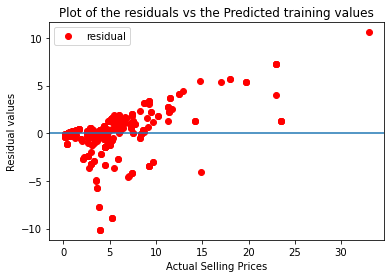

In [15]:
# your code here 
residual = y_train - y_pred_train  #is the difference between real value and approximated value

plt.figure()
plt.plot(y_train,residual,'ro' ,label = "residual")
plt.xlabel("Actual Selling Prices")
plt.ylabel("Residual values")
plt.axhline()
plt.title("Plot of the residuals vs the Predicted training values")
plt.legend()

<div class='exercise-r'>  

**3.2** Discuss your results by answering the following questions.

**3.2.1** How does the test $MSE$ score compare with the best test $MSE$ value obtained with kNN regression?

</div>

**your answer here**
The test MSE score from the linear regression is within the range of MSE values obtained using the kNN regression. The best model obtained from the kNN regression has a lower MSE value than the one obtained from the linear regression. This shows that the linear model could not fit the model as well as the kNN model.

<div class='exercise-r'>  

**3.2.2** What does the sign of the slope of the fitted linear model convey about the relationship between the predictor and the response?

</div>

**your answer here**
The slope is a positive integer showing that the relationship between the predictor and response is positive. It means that as the MRP goes up so will the Current Selling Price, which matches what was seen in the scatterplot from question 1.4 and gives a good indication that I chose the right measure.

<div class='exercise-r'>  

**3.2.3** Discuss the shape of the residual plot and what it shows for the quality of the model. Be sure to discuss whether or not the assumption of linearity is valid for this data.

</div>

**your answer here**
The shape is not just white noise. There seems to be a trend in the noise because as y values increase so does the noise. This typically signals that the model we chose is wrong. 


<a id="part4questions"></a>

## <div class='exercise'><b>Question 4 (required for 209a students, optional for others):  Linear regression with feature engineering [10 pts]</b></div>

[Return to contents](#contents)

**4.1** Creating a new variable from existing data: **percentage depreciation**

Feature engineering involves transforming data into features that better represent the underlying problem for a predictive model. This typically results in improved model accuracy on unseen data. 

Our previous regression model explores the relationship between `Current_Selling_Price` (CSP) and `MRP`.

$$CSP = \beta_0 + \beta_1 \cdot MRP$$

However, this linear equation does not incorparate other interesting variables such as the year of manufacture (`Year`), or the kilometers driven (`Kms_Driven`), which may be important factors that affect the current value of the car.

Instead of using multi-linear analysis, we can perform some intelligent feature engineering to identify other simple linear relationships within our data.

From practical experience, we know that the percentage drop of a car's price is proportional to the age of the car ([more on car depreciation here](https://www.finder.com/what-is-car-depreciation)). 

Hence, it makes sense to investigate this variable seperately and try to identify possible relationships with other variables.  

Define the "percentage depreciation" of the current selling price to the MRP as follows:

$$\textrm{Percentage of the Selling Price} = perc =\frac{MRP - CSP}{MRP}$$
    
Create a new column in your dataframe with each car's `perc` value.

    
**4.2** Exploratory Data Analysis

For this section, we will consider `perc` to be our intermediate response variable. To understand the relationship between `perc` and our predictor variables we will perform EDA.

Answer the following questions by plotting graphs and including the required interpretation:

- **4.2.1** It was seen previously that there is a relationship between `Year` and `Current_Selling_Price`. Is the relationship between `Year` and `perc` the same. If not, how has it changed and why do you think so?

- **4.2.2** Is the trend between the `MRP` and `perc` the same as that between `MRP` and `Current_Selling_Price`?

- **4.2.3** Does there seem to be a relationship between `Kms_Driven` and `perc`? 

- **4.2.4** Which is the best predictor to predict `perc` (if there is one)? Is it the same as that of `Current_Selling_price` or has it changed?


**4.3** Fitting a Linear Regression model

Based on your EDA choose appropriate **predictor** variables for `perc` as your **response** variable. Use the same split train-test sets with training data of 75% and testing data of 25%.

- Fit a separate Linear Regression model for each of the predictors.
- Plot each linear model with the training and test data (in different colors with clear legends)
- Report the $MSE$ score from the training and test sets for each model.
- Find the best model (i.e. the best predictor) based on the $MSE$ of each model.


**4.4** You have now established a good linear model for **response** `perc`. At the same time, you also know the relationship between `perc` and `Current_Selling_Price`, which is the **response** that we ultimately want to model. Combining the two pieces of knowledge, what linear model can you build to model `Current_Selling_Price` directly with the predictor that models `perc` the best? Build that model and inspect the $R^2$ score of the new model on `Current_Selling_Price`. Explain the approach you have chosen to take (be explicit in your description). Is the new model better than the model you had built in [Question 3](#part3questions)?

## Question 4: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>  

**4.1** Creating a new variable from existing data: **percentage depreciation**

Feature engineering involves transforming data into features that better represent the underlying problem for a predictive model. This typically results in improved model accuracy on unseen data. 

Our previous regression model explores the relationship between `Current_Selling_Price` (CSP) and `MRP`.

$$CSP = \beta_0 + \beta_1 \cdot MRP$$

However, this linear equation does not incorparate other interesting variables such as the year of manufacture (`Year`), or the kilometers driven (`Kms_Driven`), which may be important factors that affect the current value of the car.

Instead of using multi-linear analysis, we can perform some intelligent feature engineering to identify other simple linear relationships within our data.

From practical experience, we know that the percentage drop of a car's price is proportional to the age of the car ([more on car depreciation here](https://www.finder.com/what-is-car-depreciation)). 

Hence, it makes sense to investigate this variable seperately and try to identify possible relationships with other variables.  

Define the "percentage depreciation" of the current selling price to the MRP as follows:

$$\textrm{Percentage of the Selling Price} = perc =\frac{MRP - CSP}{MRP}$$
    
Create a new column in your dataframe with each car's `perc` value.

</div>

In [16]:
# your code here


<div class='exercise-r'>  

**4.2** Exploratory Data Analysis

For this section, we will consider `perc` to be our intermediate response variable. To understand the relationship between `perc` and our predictor variables we will perform EDA.

Answer the following questions by plotting graphs and including the required interpretation:

**4.2.1** It was seen previously that there is a relationship between `Year` and `Current_Selling_Price`. Is the relationship between `Year` and `perc` the same. If not, how has it changed and why do you think so?

</div>

In [17]:
# your code here


**INTERPRETATION:**

**your answer here**


<div class='exercise-r'>  

**4.2.2** Is the trend between the `MRP` and `perc` the same as that between `MRP` and `Current_Selling_Price`?

</div>

In [18]:
# your code here


**INTERPRETATION:**

**your answer here**


<div class='exercise-r'>  

**4.2.3** Does there seem to be a relationship between `Kms_Driven` and `perc`? 

</div>

In [19]:
# your code here


**INTERPRETATION:**

**your answer here**


<div class='exercise-r'>  

**4.2.4** Which is the best predictor to predict `perc` (if there is one)? Is it the same as that of `Current_Selling_price` or has it changed? 

</div>

**your answer here**


<div class='exercise-r'>  

**4.3** Fitting a Linear Regression model

Based on your EDA choose appropriate **predictor** variables for `perc` as your **response** variable. Use the same split train-test sets with training data of 75% and testing data of 25%.

- Fit a separate Linear Regression model for each of the predictors.
- Plot each linear model with the training and test data (in different colors with clear legends)
- Report the $MSE$ score from the training and test sets for each model.
- Find the best model (i.e. the best predictor) based on the $MSE$ of each model.

</div>

In [20]:
# your code here


**INTERPRETATION:**

**your answer here**


<div class='exercise-r'>  

**4.4** You have now established a good linear model for **response** `perc`. At the same time, you also know the relationship between `perc` and `Current_Selling_Price`, which is the **response** that we ultimately want to model. Combining the two pieces of knowledge, what linear model can you build to model `Current_Selling_Price` directly with the predictor that models `perc` the best? Build that model and inspect the $R^2$ score of the new model on `Current_Selling_Price`. Explain the approach you have chosen to take (be explicit in your description). Is the new model better than the model you had built in [Question 3](#part3questions)?

</div>

In [21]:
# your code here


**INTERPRETATION:**

**your answer here**


<a id="part2"></a>
    
# PART 2 [40 pts]: Analysis of publically available profiles on SimplyMarry.com

[Return to contents](#contents)

<a id="part2intro"></a>

## Overview

[Return to contents](#contents)

In this part we analyze data from publically available [profiles on SimplyMarry.com](https://en.wikipedia.org/wiki/SimplyMarry), an Indian matrimonial matching portal that was closed in 2017. We will use this data to investigate relationships among various attributes reported in user profiles and examine trends embedded in this data that relate user-reported income.

### Dataset

The SimplyMarry.com data is aggregated in the file named `data/Income_prediction.csv`. All attributes in this dataset refer to traits and preferences of users looking for a spouse on SimplyMarry.com. The attributes that refer specifically to preferences, rather than traits, are clarified in the list below. 

- **age** - Age of person looking for a spouse
- **gender** - {'Female': 0, 'Male': 1} 
- **height** - Height in inches
- **bmi** - Body mass index (BMI) calculated based on height and weight
- **eating** - {'No Restrictions': 0, 'Jain': 1, 'Vegetarian': 2, 'Vegetarian With Eggs': 3, 'Non Vegetarian': 4}
- **family_type** - Family living arrangement preference of the person looking for a spouse ('Doesn't Matter': 0, 'Other': 3, 'Nuclear': 1, 'Joint family': 2}
- **status** - Social status preference of the person looking for a spouse: {'Doesn't Matter': 0, 'Middle Class': 1, 'Upper Middle Class': 2, 'High Class': 3, 'Rich / Affluent': 4}
- **manglik** - {'No': 0, 'Yes': 1, 'Do Not Know': 2} ([More on this feature](https://en.wikipedia.org/wiki/Mangala_Dosha))
- **drinking** - {'Prefers Not To Respond': 0, 'No': 1, 'Occasionally': 2, 'Yes': 3}
- **complexion** - {'Very Fair ': 1, 'Fair ': 2, 'Wheatish ': 3, 'Wheatish Medium ': 4, 'Dark': 5}
- **body** - {'Slim': 1, 'Average': 2, 'Heavy': 3, 'Athletic': 4}
- **education** - {'High School': 0, 'Some college': 1, 'Undergrad': 2, 'Grad': 3, 'Doctorate': 4}
- **city** - ('International': 1, 'Mumbai': 2, 'Delhi': 3, 'Kolkata': 4, 'Bengaluru': 5, 'Chennai': 6, 'Hyderabad': 7, 'Pune': 8, 'Ahmedabad': 9, 'Surat': 10, 'Vishakapatnam': 11, 'Others': 12)
- **income** - Annual income in dollars

**NOTE:** Within the **family_type** attribute, the 'Joint family' category denoted by a value of 2 comprises several more granular joint-family options not shown here. Those various types of joint family arrangements include 'Joint family both parents', 'Joint family only mother', 'Joint family father mother and brothers sisters', 'Joint family single parent brothers and or sisters', and 'Joint family only father', each of which has simply been aggregated under 'Joint family' in our dataset.

*Source: Harvard IACS*

### Disclaimer

This dataset is several years old and representative of profiles from a site that no longer exists. Some attributes represented in this dataset are particularly challenging to approach even with far more sophisticated analyses and nuanced considerations than we will be applying in this assignment. Extremely simple, reductive analysis on sensitive topics such as these can sometimes do more harm than good. For those reasons, please be cognizant not to draw pontentially harmful generalizations from any results or findings you generate below. We will be exploring ethics and the potential harms of biases and generalizations in data science in greater depth as we continue throughout this semester.

<a id="part5questions"></a>

## <div class='exercise'><b>Question 5: Investigating relationships of SimplyMarry.com reported attributes [25 pts]</b></div>

[Return to contents](#contents)

First we are going to use simple analytics to learn more about the relationships of different attributes in this dataset. The idea is to use basic modeling based on averages and sample distributions to uncover potential relationships in the data.

Here we will answer the below questions using plots and simple statistics.

**5.1** Is there a disparity in income of participants by gender? Consider using a log scale or another technique to communicate findings more clearly.

**5.2** Is there a relationship between income and the "eating" variable? Is there a relationship between income and skin complexion? Is it possible to consider skin complexion as an ordinal variable? For instance, consider whether retaining this ordering as in the dataset might be preferable to considering skin complexion as a categorical variable lacking order. 

**5.3** Is there a discernable trend in the incomes of participants from different regions/cities?

**5.4** Is there a clear trend between BMI and income?

**5.5** Does the level of education show a clear trend with income? Is the trend similar across both levels of the gender variable available in this dataset?

**5.6** Do any of the quantitative attributes show a clear linear or non-linear association with income?

**5.7** Is income lower or higher for those living in "nuclear" families?

**5.8** What is the average effect of the "Manglik" variable on income?


## Question 5: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>  

First we are going to use simple analytics to learn more about the relationships of different attributes in this dataset. The idea is to use basic modeling based on averages and sample distributions to uncover potential relationships in the data.

Here we will answer the below questions using plots and simple statistics.

**5.1** Is there a disparity in income of participants by gender? Consider using a log scale or another technique to communicate findings more clearly.

</div>

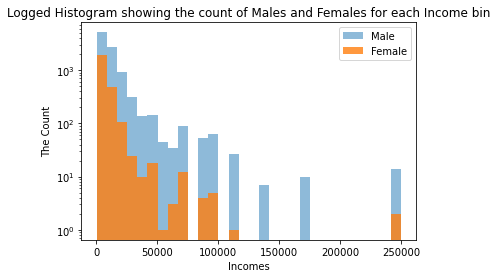

Text(0.5, 1.0, 'Bar plot of the Mean Income by Gender')

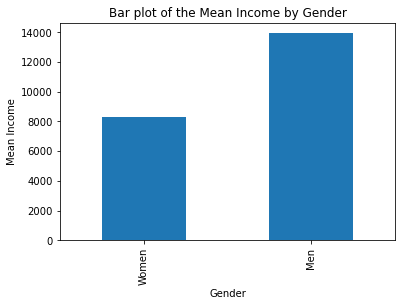

In [22]:
# your code here
# I worked with Oren Rimon

marry_data = pd.read_csv("data/Income_prediction.csv")
marry_data.head()

#Calling a gender data frame
gender = marry_data['gender' ]#females = 0 , males = 1

female = marry_data[marry_data['gender'] == 0] #finding females
female_income = female['income']

male = marry_data[marry_data['gender'] == 1] # finding males
male_income = male['income']

# Plotting a logged Histogram
bins = 30
plt.hist(male_income, bins, alpha=0.5, label='Male', log = True)
plt.hist(female_income, bins, alpha=0.8, label='Female', log = True)
plt.title('Logged Histogram showing the count of Males and Females for each Income bin')
plt.xlabel('Incomes')
plt.ylabel('The Count')
plt.legend()
plt.show()

by_gender = marry_data.groupby(by="gender").mean()
by_gender = by_gender.rename({0:"Women", 1:"Men"})
by_gender["income"].plot(kind="bar")
plt.ylabel("Mean Income")
plt.xlabel("Gender")
plt.title("Bar plot of the Mean Income by Gender")


**INTERPRETATION:**

**your answer here**
You can see that male typically have a greater amount of individuals at each income. This can show that more males are in the data set overall. We can also see that women typically crowd the lower incomes where males have some in the higher ranges, which makes sense when looking at the mean income bar plot. Males have an overall higher mean of incomes than women. This is an categorical variable.


<div class='exercise-r'>  

**5.2** Is there a relationship between income and the "eating" variable? Is there a relationship between income and skin complexion? Is it possible to consider skin complexion as an ordinal variable? For instance, consider whether retaining this ordering as in the dataset might be preferable to considering skin complexion as a categorical variable lacking order.

</div>

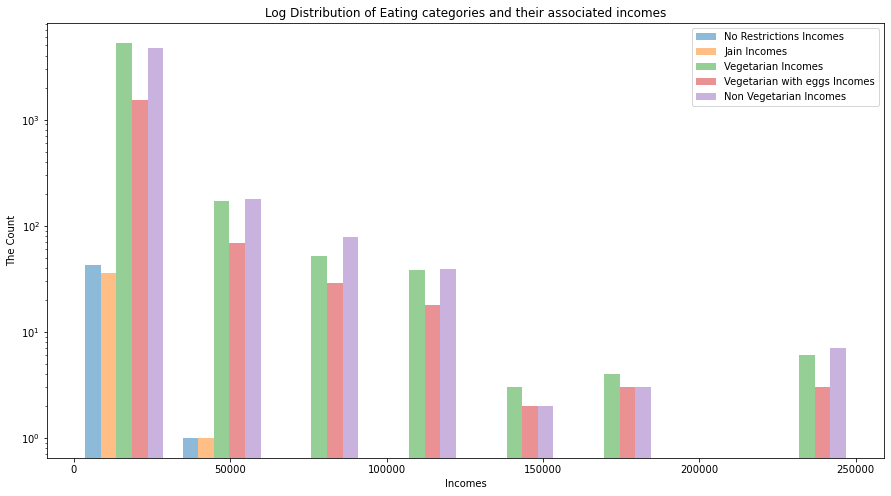

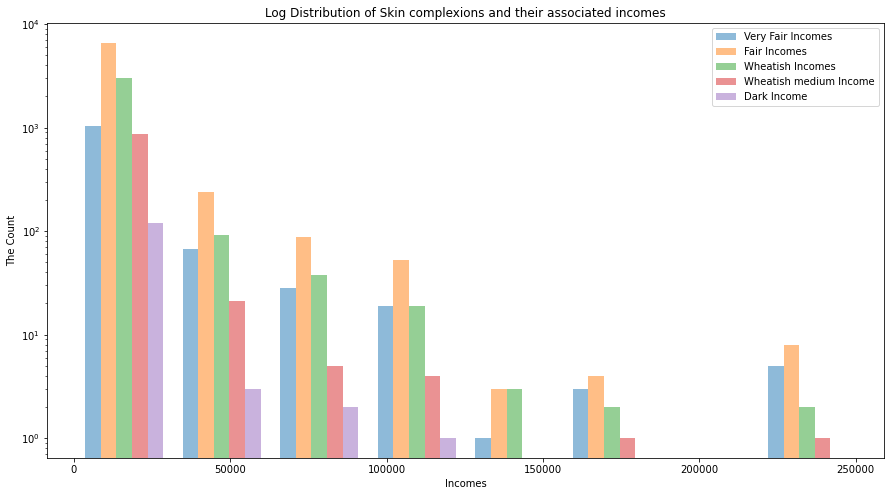

Text(0.5, 1.0, 'Bar plot of the Mean Income for each Skin Complexion')

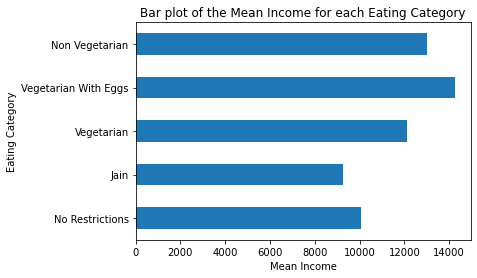

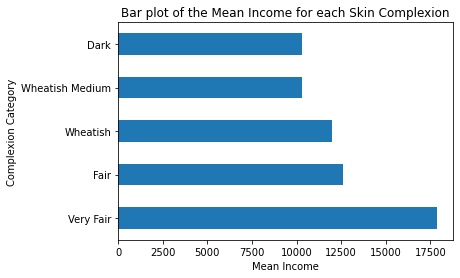

In [23]:
# your code here 
#eating variables
# I worked with Oren Rimon


# eating variables and finding their associated incomes
eating = marry_data["eating"]
income = marry_data["income"]

no_rest = marry_data[eating == 0]
no_rest_income = no_rest["income"]

jain = marry_data[eating == 1]
jain_income = jain["income"]

veg = marry_data[eating == 2]
veg_income = veg["income"]

veg_egg = marry_data[eating == 3]
veg_egg_income = veg_egg["income"]

non_veg = marry_data[eating == 4]
non_veg_income = non_veg["income"]

#skin variables and finding their associated incomes
skin = marry_data["complexion"]
very_fair = marry_data[skin == 1]
very_fair_inc = very_fair["income"]

fair = marry_data[skin == 2]
fair_inc = fair["income"]

wheatish = marry_data[skin == 3]
wheatish_inc = wheatish["income"]

wheat_med = marry_data[skin == 4]
wheat_med_inc = wheat_med["income"]

dark = marry_data[skin == 5]
dark_inc = dark["income"]

# Plot the log distributions
bins = 8
plt.figure(figsize=(15,8))
plt.hist([no_rest_income, jain_income,veg_income,veg_egg_income,non_veg_income], bins, alpha=0.5, label=['No Restrictions Incomes', 'Jain Incomes', 'Vegetarian Incomes', 'Vegetarian with eggs Incomes', 'Non Vegetarian Incomes'], log = True)
plt.title('Log Distribution of Eating categories and their associated incomes')
plt.xlabel('Incomes')
plt.ylabel('The Count')
plt.legend()
plt.show()


bins = 8
plt.figure(figsize=(15,8))
plt.hist([very_fair_inc,fair_inc,wheatish_inc,wheat_med_inc,dark_inc], bins, alpha=0.5, label=['Very Fair Incomes', 'Fair Incomes', 'Wheatish Incomes', 'Wheatish medium Income', 'Dark Income'], log = True)
plt.title('Log Distribution of Skin complexions and their associated incomes')
plt.xlabel('Incomes')
plt.ylabel('The Count')
plt.legend()
plt.show()

# Plot bar plots to see the means for each value
plt.figure()
by_eating = marry_data.groupby(by="eating")["income"].mean()
by_eating = by_eating.rename({0:'No Restrictions', 1:'Jain',2: 'Vegetarian', 3:'Vegetarian With Eggs', 4:'Non Vegetarian'})
by_eating.plot(kind="barh")
plt.xlabel("Mean Income")
plt.ylabel("Eating Category")
plt.title("Bar plot of the Mean Income for each Eating Category")

plt.figure()
by_complexion = marry_data.groupby(by="complexion").mean()
by_complexion = by_complexion.rename({1:"Very Fair", 2:"Fair", 3: "Wheatish", 4: "Wheatish Medium", 5: "Dark"})
by_complexion["income"].plot(kind="barh")
plt.xlabel("Mean Income")
plt.ylabel("Complexion Category")
plt.title("Bar plot of the Mean Income for each Skin Complexion")


**INTERPRETATION:**

**your answer here**
For the dietary/eating section, you can see that for no restrictions and jain start to taper off around 50,000 for the income. The people who identify as non-vegetarian, vegetarian, and vegetarian with eggs have a larger range of incomes as well as large counts in each income bracket because they probably make up for a large portion of society. The bar plot agree with the conclusions based off the histogram because the non vegetarian, vegetarian with eggs, and vegetarian mean incomes are higher than jain and no restrictions. I think this is a categorical variable.

For the complextion section, it seems that the only group that tapers off is the dark skin around 100,000 for income. The rest of the skin tones show a larger presence in each of the income brackets. It seems that having dark skin could relate to having lower incomes. The bar plot shows as skin color gets darker the mean incomes drop. This is not a great depiction of society but is unfortunately probably an honest one. This would be an ordinal variable because there is an order to how the skin darkens or the amount of pigmentation or how skin color progresses.


<div class='exercise-r'>  

**5.3** Is there a discernable trend in the incomes of participants from different regions/cities?

</div>

In [24]:
#city - ('International': 1, 'Mumbai': 2, 'Delhi': 3, 'Kolkata': 4, 'Bengaluru': 5, 'Chennai': 6, 'Hyderabad': 7, 'Pune': 8, 'Ahmedabad': 9, 'Surat': 10, 'Vishakapatnam': 11, 'Others': 12

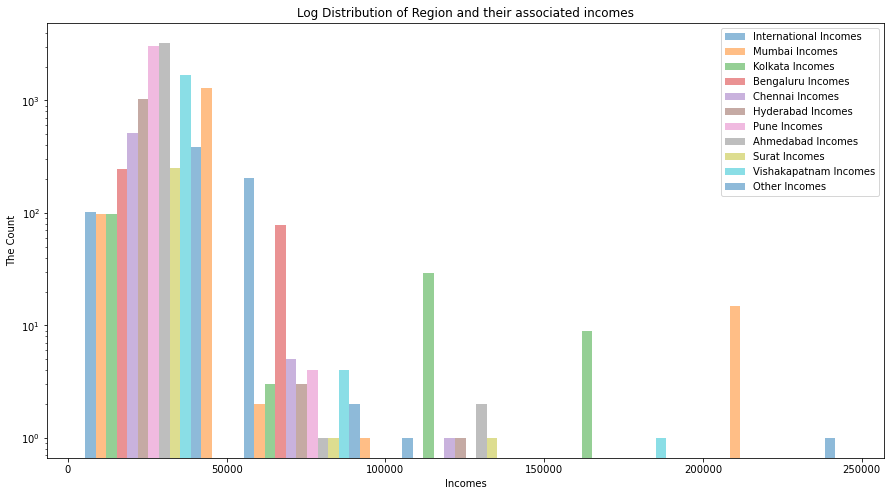

Text(0.5, 1.0, 'Mean Income by Region')

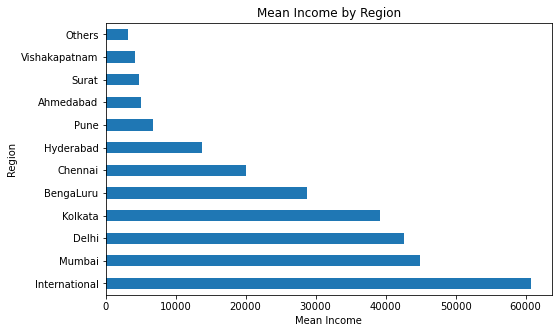

In [25]:
# your code here
# I worked with Oren Rimon
marry_data.head()
city = marry_data["city"]

inter = marry_data[city == 1]
inter_inc = inter["income"]

mumbai = marry_data[city == 2]
mumbai_inc = mumbai["income"]

delhi = marry_data[city == 3]
delhi_inc = delhi["income"]

kolkata = marry_data[city == 4]
kolkata_inc = kolkata["income"]

beng = marry_data[city == 5]
beng_inc = beng["income"]

chen = marry_data[city == 6]
chen_inc = chen["income"]

hyd = marry_data[city == 7]
hyd_inc = hyd["income"]

pune = marry_data[city == 8]
pune_inc = pune["income"]

ahm = marry_data[city == 9]
ahm_inc = ahm["income"]

surat = marry_data[city == 10]
surat_inc = surat["income"]

vish = marry_data[city == 11]
vish_inc = vish["income"]

other = marry_data[city == 12]
other_inc = other["income"]

bins = 5
plt.figure(figsize=(15,8))
plt.hist([inter_inc,mumbai_inc,delhi_inc,kolkata_inc,beng_inc, chen_inc,hyd_inc, pune_inc,ahm_inc,surat_inc, \
         vish_inc, other_inc], bins, alpha=0.5, label=['International Incomes', 'Mumbai Incomes', 'Kolkata Incomes', \
        'Bengaluru Incomes', 'Chennai Incomes', 'Hyderabad Incomes', 'Pune Incomes', 'Ahmedabad Incomes', 'Surat Incomes',\
        'Vishakapatnam Incomes', 'Other Incomes'], log = True)
plt.title('Log Distribution of Region and their associated incomes')
plt.xlabel('Incomes')
plt.ylabel('The Count')
plt.legend()
plt.show()


#plot bar plot
by_region = marry_data.groupby(by="city").mean()
by_region = by_region.rename({1:'International', 2:'Mumbai', 3:'Delhi', 4:'Kolkata', 5:'BengaLuru', 6:'Chennai', 7:'Hyderabad', 8:'Pune', 9:'Ahmedabad', 10:'Surat', 11:'Vishakapatnam',12: 'Others'})
by_region["income"].plot(kind='barh', figsize=(8,5))
plt.xlabel("Mean Income")
plt.ylabel("Region")
plt.title("Mean Income by Region")



**INTERPRETATION:**

**your answer here**
The histogram shows that international is at the highest income bracket with a small count. The bar plot shows data that is better to navigate with the mean income of each region identified. It looks like those who identify as Internation make the larger amount of incomes with Mumbai coming second. 


<div class='exercise-r'>  

**5.4** Is there a clear trend between BMI and income?

</div>

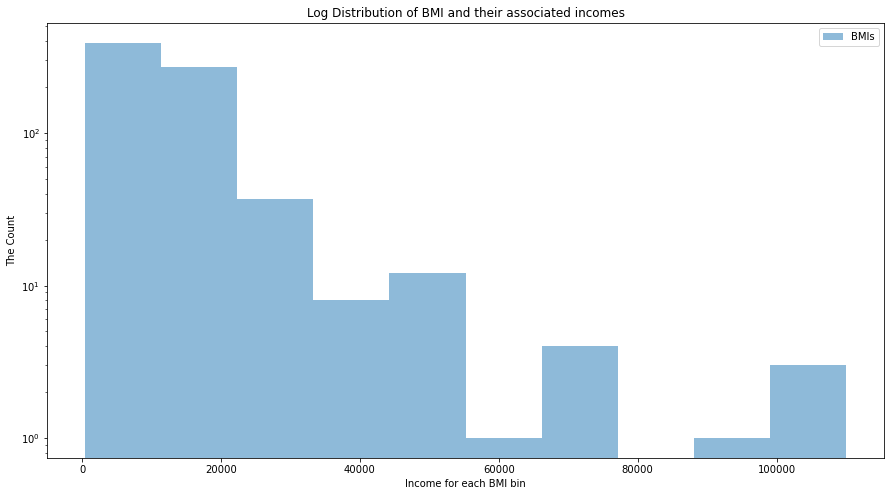

Text(0.5, 1.0, 'Mean Income by BMI')

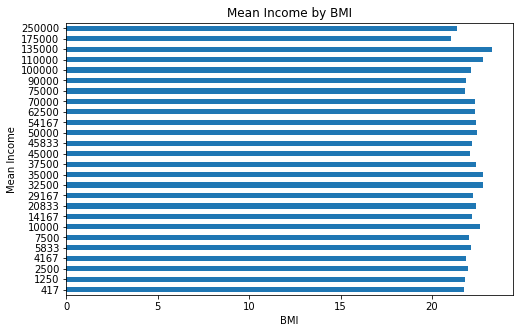

In [26]:
# your code here
# I worked with Oren Rimon
marry_data.head()
by_bmi = marry_data.groupby(by="bmi").mean()
bmi_inc = by_bmi["income"]

bins = 10
plt.figure(figsize=(15,8))
plt.hist(bmi_inc, bins, alpha=0.5, label= 'BMIs', log = True)
plt.title('Log Distribution of BMI and their associated incomes')
plt.xlabel('Income for each BMI bin')
plt.ylabel('The Count')
plt.legend()
plt.show()

#Plot bar plots
by_income = marry_data.groupby(by = "income").mean()
by_income["bmi"].plot(kind='barh', figsize=(8,5))
plt.xlabel("BMI")
plt.ylabel("Mean Income")
plt.title("Mean Income by BMI")



**INTERPRETATION:**

**your answer here**
There does not seem to be a clear trend between BMI and incomes. The bar plot shows mean incomes for different BMI values and there does not seem to be a noticeable trend.

<div class='exercise-r'>  

**5.5** Does the level of education show a clear trend with income? Is the trend similar across both levels of the gender variable available in this dataset?

</div>

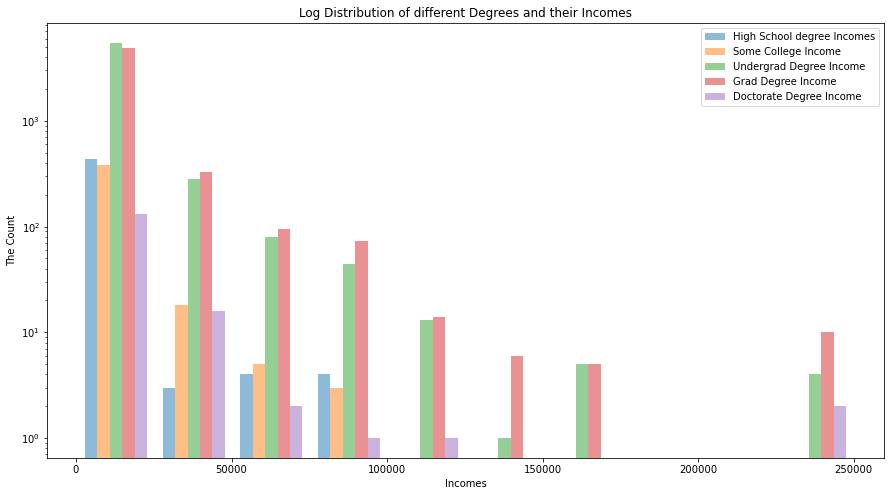

Text(0.5, 1.0, 'Mean Income for each Education Level over whole Data Frame')

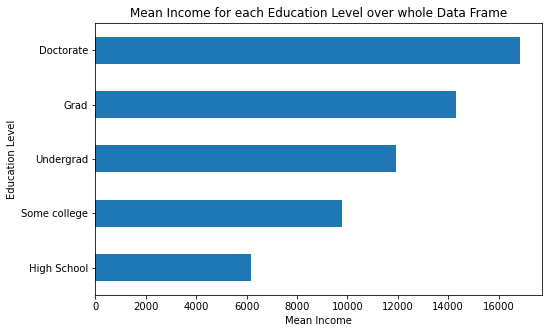

In [27]:
# your code here
#education - {'High School': 0, 'Some college': 1, 'Undergrad': 2, 'Grad': 3, 'Doctorate': 4}
# I worked with Oren Rimon

edu = marry_data["education"]

hs = marry_data[edu == 0]
hs_inc = hs["income"]

some = marry_data[edu == 1]
some_inc = some["income"]

ugrad = marry_data[edu == 2]
ugrad_inc = ugrad["income"]

grad = marry_data[edu == 3]
grad_inc = grad["income"]

dr = marry_data[edu == 4]
dr_inc = dr["income"]

bins = 10
plt.figure(figsize=(15,8))
plt.hist([hs_inc, some_inc, ugrad_inc,grad_inc,dr_inc], bins, alpha=0.5, label=['High School degree Incomes',\
        'Some College Income','Undergrad Degree Income', 'Grad Degree Income', 'Doctorate Degree Income'], log = True)
plt.xlabel('Incomes')
plt.ylabel('The Count')
plt.legend()
plt.title("Log Distribution of different Degrees and their Incomes")
plt.show()

# Plot bar plots
plt.figure()
by_degree = marry_data.groupby(by = "education").mean()
by_degree = by_degree.rename({0:'High School',1: 'Some college', 2:'Undergrad', 3:'Grad', 4:'Doctorate'})
by_degree["income"].plot(kind='barh', figsize=(8,5))
plt.xlabel('Mean Income')
plt.ylabel("Education Level")
plt.title("Mean Income for each Education Level over whole Data Frame")


#Plotted incomes by education for each gender in a cell below to keep things clean

Text(0.5, 1.0, 'Mean Income for each Education Level for females')

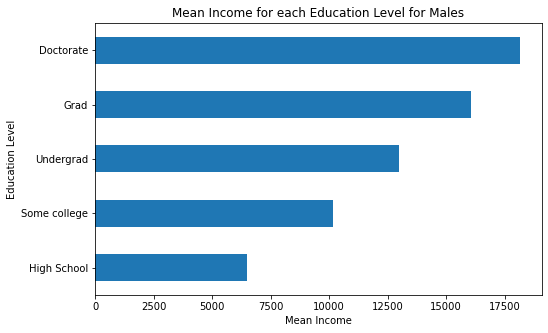

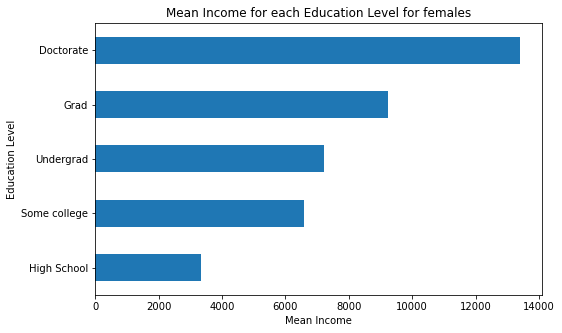

In [28]:

#figure out education means for male and female

#broke the data set into male and female
gender = marry_data['gender']
male = marry_data[gender == 1]
female = marry_data[gender == 0]

#Plotting Bar plot for females in data set 
plt.figure()
by_income_m = male.groupby(by = "education").mean()
by_income_m = by_income_m.rename({0:'High School',1: 'Some college', 2:'Undergrad', 3:'Grad', 4:'Doctorate'})
by_income_m["income"].plot(kind = "barh", figsize = (8,5))
plt.xlabel('Mean Income')
plt.ylabel("Education Level")
plt.title("Mean Income for each Education Level for Males")

plt.figure()
by_income_f = female.groupby(by = "education").mean()
by_income_f = by_income_f.rename({0:'High School',1: 'Some college', 2:'Undergrad', 3:'Grad', 4:'Doctorate'})
by_income_f["income"].plot(kind = "barh", figsize = (8,5))
plt.xlabel('Mean Income')
plt.ylabel("Education Level")
plt.title("Mean Income for each Education Level for females")


#Plotting Bar plot for males in data set 

**INTERPRETATION:**

**your answer here**
There is a clear trend that with the higher level of education the higher mean income that category has. This matches what I expect within society because a more specialized degree or higher education typically signals to employers different talents that are typically seen as more valuable in society. The bar plots between the genders also match my expectations with women having lower mean incomes than the males. I am taking a sociology course called Men and Women in the workplace, which talks about gender disparities across occupations and within the labor force. It has been seen that women have typically surpassed men in levels of education but are still undervalued overall, matching the trend in the data.

<div class='exercise-r'>  

**5.6** Do any of the quantitative attributes show a clear linear or non-linear association with income?

</div>

Text(0.5, 1.0, 'Mean Income by Height')

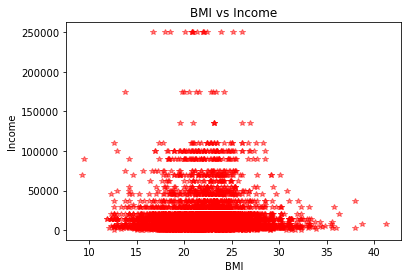

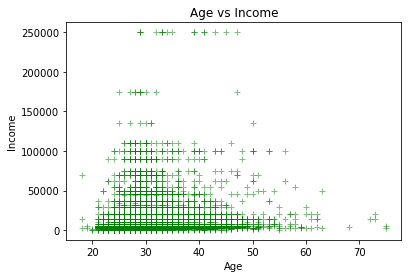

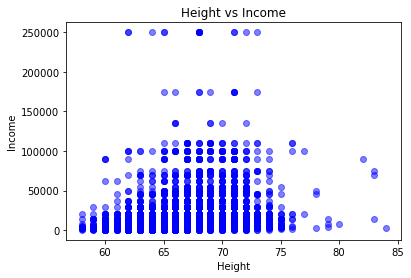

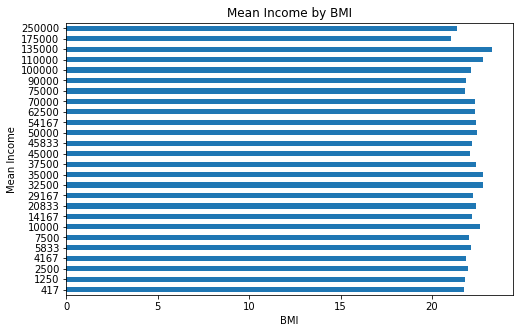

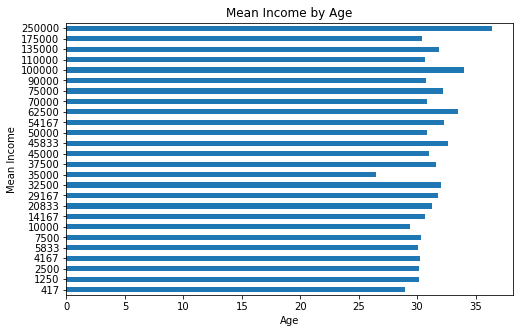

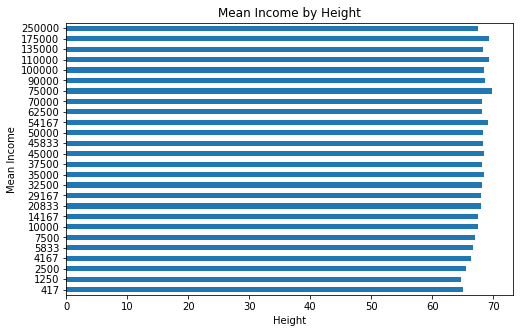

In [29]:
# your code here
# quantitative = bmi, age, height, income,

income = marry_data["income"]

bmi = marry_data["bmi"]
age = marry_data["age"]
height = marry_data["height"]

plt.figure()
plt.plot(bmi, income, 'r*', alpha = 0.5 )
plt.title('BMI vs Income')
plt.xlabel('BMI')
plt.ylabel('Income')

plt.figure()
plt.plot(age, income, 'g+', alpha = 0.5 )
plt.title('Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')

plt.figure()
plt.plot(height, income, 'bo', alpha = 0.5 )
plt.title('Height vs Income')
plt.xlabel('Height')
plt.ylabel('Income')

#plot scatterplots
plt.figure()
by_income = marry_data.groupby(by = "income").mean()
by_income["bmi"].plot(kind='barh', figsize=(8,5))
plt.ylabel("Mean Income")
plt.xlabel("BMI")
plt.title("Mean Income by BMI")

plt.figure()
by_income["age"].plot(kind='barh', figsize=(8,5))
plt.ylabel("Mean Income")
plt.xlabel("Age")
plt.title("Mean Income by Age")

plt.figure()
by_income["height"].plot(kind='barh', figsize=(8,5))
plt.ylabel("Mean Income")
plt.xlabel("Height")
plt.title("Mean Income by Height")



**INTERPRETATION:**

**your answer here**
The scatter plots and bar plots do not show any linear data trends between the quantitative attributes (height, age, bmi) that were chosen. The relationships look more quadratic in nature when looking at the scatter plots.

<div class='exercise-r'>  

**5.7** Is income lower or higher for those living in "nuclear" families?

</div>

In [30]:
# your code here 
#family_type - Family living arrangement preference of the person looking for a spouse 
#('Doesn't Matter': 0, 'Other': 3, 'Nuclear': 1, 'Joint family': 2}

fam = marry_data["family_type"]
nuclear= marry_data[fam == 1]
nuc_inc_mean = nuclear["income"].mean()
#print(nuclear.shape)

not_nuc = marry_data[fam != 1]
not_nuc_mean = not_nuc["income"].mean()
#print(not_nuc.shape)



print(f"Here is the mean of incomes for Nuclear families {nuc_inc_mean:.3f} \n"
     f"Here is the mean of incomes for families that don't identify as Nuclear {not_nuc_mean:.3f}")



Here is the mean of incomes for Nuclear families 13805.933 
Here is the mean of incomes for families that don't identify as Nuclear 11420.541


**INTERPRETATION:**

**your answer here**
It shows that for those in nuclear families have a larger mean of incomes versus those not in nuclear families. This may not be an accurate representation of how being in a nuclear family affects income because there could be more parameters that affect income. This is also a preference item that someone is looking for in a person rather than if they are in a nuclear family or not.


<div class='exercise-r'>  

**5.8** What is the average effect of the "Manglik" variable on income?

</div>

In [31]:
# your code here
# manglik - {'No': 0, 'Yes': 1, 'Do Not Know': 2

marry_data.head()
manglik = marry_data["manglik"]

no = marry_data[manglik == 0]
no_inc = no["income"].mean()


yes = marry_data[manglik == 1]
yes_inc = yes["income"].mean()

idk = marry_data[manglik == 2]
idk_inc = idk["income"].mean()

print(f"Here is the average income for people who are not manglik {no_inc:.3f} \n"
     f"Here is the average income for people who are manglik {yes_inc:.3f} \n"
     f"Here is the average income for people who do not know if they manglik {idk_inc:.3f} \n")





Here is the average income for people who are not manglik 13068.402 
Here is the average income for people who are manglik 11899.045 
Here is the average income for people who do not know if they manglik 11995.654 



**INTERPRETATION:**

**your answer here**
The data shows that those who are not manglik typically have higher average incomes those who are and don't know if they are.


<a id="part6questions"></a>

## <div class='exercise'><b>Question 6:  Calculate the Gini coefficient [15 pts]</b></div>

[Return to contents](#contents)


**Gini coefficients are often used to quantify income inequality.** For an introductory overview of the Gini coefficient, its derivation, and its uses, feel free to [read more about it here](https://en.wikipedia.org/wiki/Gini_coefficient). That article also provides [a useful graphical representation](https://en.wikipedia.org/wiki/File:Economics_Gini_coefficient2.svg) of the Gini coefficient to better understand how it measures inequality. 

The Gini coefficient is defined by the formula:

$$G = \dfrac{ \sum_{i=1}^{n} (2i - n - 1) x_i}{n  \sum_{i=1}^{n} x_i}$$

where $x$ is an observed value, $n$ is the number of values observed and $i$ is the rank of values in **ascending** order.

A Gini coefficient of $G=0$ implies perfect income equality, whereas a Gini coefficient close to $G=1$ implies a concentration of wealth among the richest few.

**6.1** Based on the above formula, calculate and report the Gini coefficient for the income of the participants in our SimplyMarry.com dataset.

- **NOTE:** For algorithmic simplicity and consistency, you can rank income values for all observations, keeping duplicate values in your sorted array. Therefore, you will likely have sorted income values $x_i$ similar to `[417, 417, 417, ..., 250000, 250000, 250000]` with corresponding rank indices $i$ similar to `[1, 2, 3, ..., 12353, 12354, 12355]`. Nothing more sophisticated than that is required for dealing with ties (i.e. duplicates) in your sorted income values for Question 6.1.

**6.2** Compare your Gini coefficient with Gini benchmark countries:

- According to the [world bank estimate](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) the country with the largest Gini coefficient is South Africa, ranked 1st at $0.63$, while the lowest is Ukraine, ranked 159th at $0.25$. India (i.e. SimplyMarry.com's primary user base) is ranked 95th on the list and has a Gini index of $0.357$.


- Based on your calculated Gini coefficient value for this dataset, what is your conclusion on the relationship of the income disparity of SimplyMarry.com's user base compared to the three countries listed above?


- Do the data source, self-report nature of the data, or sampling procedure affect your conclusions? If so, how?

## Question 6: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>  

**Gini coefficients are often used to quantify income inequality.** For an introductory overview of the Gini coefficient, its derivation, and its uses, feel free to [read more about it here](https://en.wikipedia.org/wiki/Gini_coefficient). That article also provides [a useful graphical representation](https://en.wikipedia.org/wiki/File:Economics_Gini_coefficient2.svg) of the Gini coefficient to better understand how it measures inequality. 

The Gini coefficient is defined by the formula:

$$G = \dfrac{ \sum_{i=1}^{n} (2i - n - 1) x_i}{n  \sum_{i=1}^{n} x_i}$$

where $x$ is an observed value, $n$ is the number of values observed and $i$ is the rank of values in **ascending** order.

A Gini coefficient of $G=0$ implies perfect income equality, whereas a Gini coefficient close to $G=1$ implies a concentration of wealth among the richest few.

**6.1** Based on the above formula, calculate and report the Gini coefficient for the income of the participants in our SimplyMarry.com dataset.

- **NOTE:** For algorithmic simplicity and consistency, you can rank income values for all observations, keeping duplicate values in your sorted array. Therefore, you will likely have sorted income values $x_i$ similar to `[417, 417, 417, ..., 250000, 250000, 250000]` with corresponding rank indices $i$ similar to `[1, 2, 3, ..., 12353, 12354, 12355]`. Nothing more sophisticated than that is required for dealing with ties (i.e. duplicates) in your sorted income values for Question 6.1.

</div>

In [32]:
# your code here
income_asc = marry_data.sort_values("income", ascending = True)
income = income_asc["income"]

n = int(len(income))


i = 0
top_sum = 0
bot_sum = 0

for i in range(0,n): 
    x = income.iloc[i]
    top_sum = top_sum + (2*(i+1) - n - 1) * x
    bot_sum = bot_sum + x
    i += 1


g_coef = top_sum/(n*bot_sum)
print(f"The Gini coefficient is {g_coef:3f}")

The Gini coefficient is 0.497200


<div class='exercise-r'>  

**6.2** Compare your Gini coefficient with Gini benchmark countries:

- According to the [world bank estimate](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) the country with the largest Gini coefficient is South Africa, ranked 1st at $0.63$, while the lowest is Ukraine, ranked 159th at $0.25$. India (i.e. SimplyMarry.com's primary user base) is ranked 95th on the list and has a Gini index of $0.357$.


- Based on your calculated Gini coefficient value for this dataset, what is your conclusion on the relationship of the income disparity of SimplyMarry.com's user base compared to the three countries listed above?


- Do the data source, self-report nature of the data, or sampling procedure affect your conclusions? If so, how?

</div>

**your answer here**
The Gini is 0.4972, which would place the Simply Marry user base at 15th. The income disparity of the SimplyMarry.com's user base may not be the most accurate representation of those users because of how much it differs from the actual Gini coefficient of India. The larger the Gini coefficient means the more income disparity there is within the country or data set. This matches the disaprities or trends seen in the data evaluated in earlier parts of the problem especially the difference in incomes between genders. There must be a larger disparaity between those on Simply Marry than people overall in India and the Ukraine. I believe that the data source does affect my conclusions because it is a different reporting method than how the Gini coefficients of the other countries were found. The discrepency in data collection could account for errors. The sampling procedure will also cause a difference because it doesn't look at similar populations as those within the whole country. The people using Simply Marry could be of a specific age range or family background that can might correlate to certain incomes.

<a id="part7questions"></a>

### <div class='exercise'><b>Question 7 (required for 209a students, optional for others): Multi-linear regression [10 pts]</b></div>

[Return to contents](#contents)

Now we increase the scope of our analysis to solve another problem that is related to income of our SimplyMarry.com users.


![](data/modi.png)

*Image Source: [The Economic Times](https://economictimes.indiatimes.com/news/politics-and-nation/you-can-run-but-cant-hide-modis-long-arm-reaches-out-for-tax-evaders/articleshow/62293002.cms)*

### Problem Description

Owing to a large number of people underreporting their income to evade taxes, as [reported by The Economic Times in 2017](https://economictimes.indiatimes.com/news/politics-and-nation/you-can-run-but-cant-hide-modis-long-arm-reaches-out-for-tax-evaders/articleshow/62293002.cms), the Income Tax Department of India wants you, an esteemed data scientist, to build a machine learning model that can predict the income of a given tax-payer based on information commonly available on SimplyMarry.com.

This will help the department flag suspected individuals who may show discernable trends of earing high values of income but are excessively under-reporting on their annual income.

The goal is to build the best model with the given SimplyMarry.com dataset, using both the categorical and quantitative predictors available in this dataset.

As with all other homework problems, this is a learning exercise. And, as absurd or problematic as it might seem to use SimplyMarry.com data for this purpose, in the real world, it will be your decision to choose the types of data science projects on which you will work as well as the clients with which you will work. 

### Deliverables

To accomplish this task, we will fit a multiple linear regression model to the training set.

Use the `sklearn` library. Your code should be contained in a Jupyter notebook cell.  An appropriate level of code comments are necessary.  Your code should run and output the required outputs described below.

### Required Outputs

- Fit a multiple linear regression model on the training set and predict on the train and test sets.
- Report the $MSE$ for the train and test set.
- Report the $R^2$ score on the test set.
- Make a plot of residuals vs. log of predicted values $\hat{y}$, with residuals on the $y$-axis and predicted values on the $x$-axis. Use the formula ${\epsilon} = y - \hat{y}$ to compute the residual values. Include a horizontal line denoting the zero residual value on the $y$-axis.
- Plot a histogram of the residuals values.
- Be certain to provide a written interpretation of your findings and any important aspects of your modeling approach of which you'd want the teaching staff to be aware, particularly if you attempt any optional outputs as mentioned below.

### Optional Outputs

You are encouraged to experiment with ways to improve your model *after first reporting results with only the required outputs*. Some ideas are given below:

- Polynomial terms for continous variables,
- Interaction terms between variables,
- Feature selection among given predictors.


## Question 7: Solutions 

[Return to contents](#contents)

In [33]:
# your code here


**INTERPRETATION:**

**your answer here**
